## 🗃️ Diccionario de Datos - Variables del Dataset 


### **Identificacion** (identificadora)
Identificador único para cada fruta.

---

### **Tamaño** (numerica continua)
Tamaño de la fruta.

---

### **Peso** (numerica continua)
Peso de la fruta.

---

### **Dulzura** (numerica continua)
Grado de dulzura de la fruta.

---

### **Crujiente** (numerica continua)
Textura que indica lo crujiente de la fruta.

---

### **Jugocidad** (numerica continua)
Nivel de jugosidad de la fruta.

---

### **Madurez** (numerica continua)
Estado de maduración del fruto.

---

### **Acidez** (numerica continua)
Nivel de acidez de la fruta.

---

### **Calidad** (categorica binaria)
- `good` = 1 
- `bad` = 0

---





['identificacion', 'tamaño', 'peso', 'dulzura', 'crujiente', 'jugosidad', 'madurez', 'acidez', 'calidad']


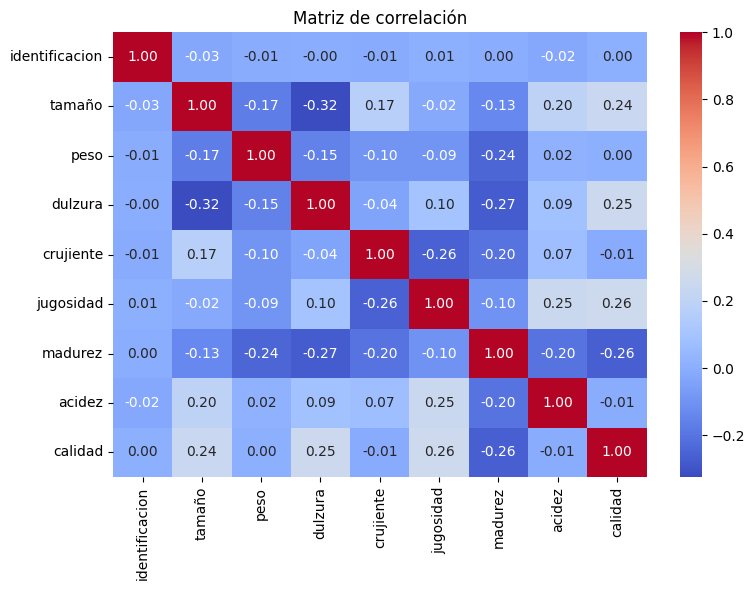

Correlación con la variable objetivo 'calidad':
madurez          -0.264315
crujiente        -0.012376
acidez           -0.007697
peso              0.001421
identificacion    0.004875
tamaño            0.244007
dulzura           0.250998
jugosidad         0.260223
calidad           1.000000
Name: calidad, dtype: float64


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar base de datos
df = pd.read_csv("calidad_manzana.csv")

df['calidad'] = df['calidad'].map({'good': 1, 'bad':0}) #conversion de variable categorica a numerica


columnas_numericas= df.select_dtypes(include='number').columns.tolist() #lista con nombres de todas las columnas
print (columnas_numericas)
df_numerico=df[columnas_numericas].dropna() #nuevo dataframe sin valores NaN


matriz_correlacion = df_numerico.corr() #calculo matriz correlacion

# Dibujar el mapa de calor
plt.figure(figsize=(8, 6)) #tamaño mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f") #anot (valores en cada celda), cmap (paleta colores), fmt (cant decimales)
plt.title("Matriz de correlación") #titulo de grafico
plt.tight_layout() #evita superposicion de elementos
plt.show()

#la correlación con la variable 'calidad'
print("Correlación con la variable objetivo 'calidad':")
print(matriz_correlacion['calidad'].sort_values())#imprime la correlación de cada variable respecto a 'estado'


## Análisis de Correlaciones

---

### Variables más influyentes (positivas):

- **Jugosidad**, **dulzura** y **tamaño** tienen la mayor correlación positiva con una manzana de calidad (`good`), lo que sugiere que mientras más **jugosa**, **dulce** y **grande** sea, más probable es que se considere de **buena calidad**.

###  Variable más influyente (negativa):

- **Madurez** presenta una **correlación negativa moderada**, lo que indica que una **madurez excesiva** podría **disminuir** la probabilidad de que una manzana sea considerada de buena calidad.

###  Variables poco relevantes:

- **Crujiente**, **peso** e **identificación** tienen **correlaciones cercanas a cero**, por lo que parecen tener **poco o ningún impacto** en la predicción de la calidad.

---

# Análisis de Factibilidad

### Propósito del Modelo / Consideraciones y Mejoras

- El proposito principal de entrenar esta red es, a traves de los datos ingresados predecir si es buena o mala por sus caracteristicas fisicas (peso, tamaño, dulzura,  madurez, entre otros) las cuales están relacionadas a como una persona evaluaría la manzana a través del tacto, sabor y otras percepciones humanas.
Por ultimo esta base es adecuada ya que tenemmos varias columnas numericas las cuales estan correlacionadas en su mayoria y una sola que no es numerica pero se pasa a binaria, es la columna "Calidad" que se transforma de 1= good, 0= bad, esta ultima seria nuestra columna objetivo
---

# Datos Atípicos y Limpieza de Datos


Cantidad de outliers detectados:
identificacion: 0 casos
tamaño: 22 casos
peso: 54 casos
dulzura: 32 casos
crujiente: 47 casos
jugosidad: 32 casos
madurez: 24 casos
acidez: 20 casos
calidad: 0 casos


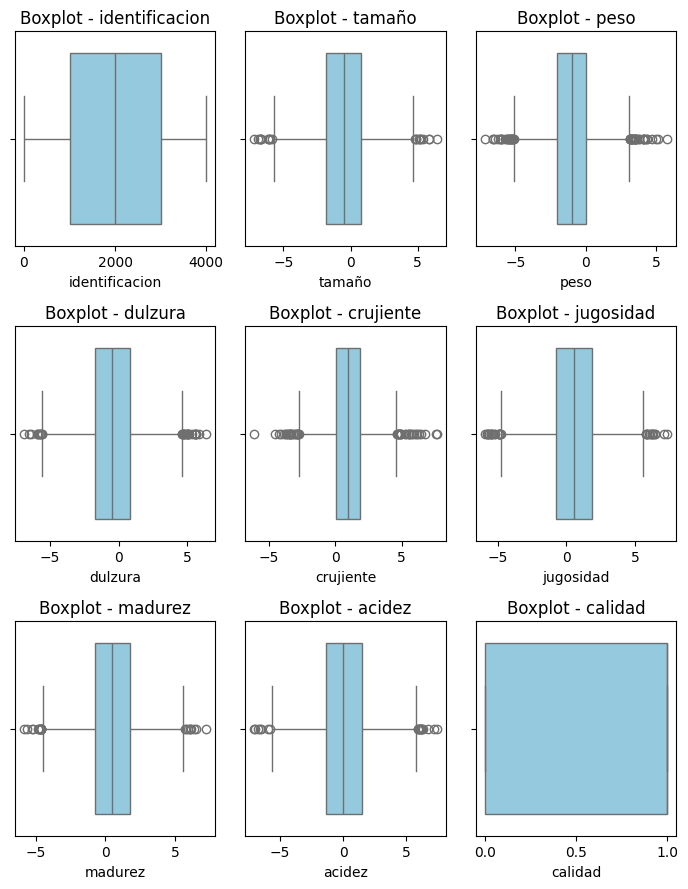

Cantidad de filas antes de eliminar valores NaN:4000
Cantidad de filas antes de eliminar valores atipicos:4000
Nueva cantidad de filas después de eliminar valores atipicos: 3790


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("calidad_manzana.csv") #cargar base de datos

df['calidad'] = df['calidad'].map({'good': 1, 'bad':0}) #conversion de variable categorica a numerica

columnas_numericas= df.select_dtypes(include='number').columns.tolist() #lista con nombres de todas las columnas
df_limpio=df[columnas_numericas].dropna() #nuevo dataframe sin valores NaN


reporte_valoresatipicos = {} #diccionario para guardar valores atipicos por variables

for col in df_limpio: #calculo IRQ por columna o variable
    Q1 = df_limpio[col].quantile(0.25)  #Q1
    Q3 = df_limpio[col].quantile(0.75)  #Q3
    IRQ = Q3 - Q1  # rango intercuartílico 

    #definicon de limites (max y min)
    minimo= Q1 - 1.5 * IRQ
    maximo= Q3 + 1.5 * IRQ

    
    valoresatipicos= df_limpio[(df_limpio[col] < minimo) | (df_limpio[col] > maximo)] #encuentra valores atipicos
    reporte_valoresatipicos[col] = len(valoresatipicos)  # cantidad de valores atipicos para cada columna o variable


print("\nCantidad de outliers detectados:") 
for columna, cant in reporte_valoresatipicos.items():
    print(f"{columna}: {cant} casos") #imprime la cantidad de valores atipicos por variable

fig, axes= plt.subplots(nrows=3, ncols=3, figsize=(7,9)) #figura con cuadriculas de 4x2 y el tamaño de la figura
axes= axes.flatten() #pasa de 2d a 1d para recorrerla

for i, columna in enumerate(df_limpio):
    sns.boxplot(data=df, x=df[columna], ax=axes[i], color='skyblue') #generacion boxplot, df, columna, eje y color
    axes[i].set_title(f'Boxplot - {columna}') #titulo de cada grafico

plt.tight_layout() #evita superposicion
plt.show()

df_notvaloratipico= df_limpio.copy() #df para eliminar valores atipicos

for col in columnas_numericas:
    Q1 = df_limpio[col].quantile(0.25)
    Q3 = df_limpio[col].quantile(0.75)
    IQR = Q3 - Q1

    minimo= Q1 - 1.5 * IQR
    maximo= Q3 + 1.5 * IQR

    df_notvaloratipico = df_notvaloratipico[(df_notvaloratipico[col] >= minimo) & (df_notvaloratipico[col] <= maximo)]

df_notvaloratipico.to_csv("calidad_manzana_limpia.csv", index=False)


print(f"Cantidad de filas antes de eliminar valores NaN:{df.shape[0]}")  

print(f"Cantidad de filas antes de eliminar valores atipicos:{df_limpio.shape[0]}")    

print(f"Nueva cantidad de filas después de eliminar valores atipicos: {df_notvaloratipico.shape[0]}")




Elimino los valores atípicos porque pueden distorsionar el análisis y afectar negativamente la precisión de los modelos.
Los identifico usando el *rango intercuartílico (IQR)* y elimino las filas que tienen valores fuera de los límites definidos *(Q1 - 1.5×IQR y Q3 + 1.5×IQR)* para cada variable numérica

---

#  Transformaciones Preliminares


Antes de entrenar un modelo de red neuronal, se llevaron a cabo distintas transformaciones sobre el conjunto de datos:

1. **Eliminación de valores atípicos**  
   Se identificaron y eliminaron registros con valores fuera del rango esperado para evitar que influyeran negativamente en el entrenamiento del modelo.

2. **Estandarización inicial con StandardScaler**  
   La base de datos que utilizamos ya tiene las variables numéricas transformadas utilizando `StandardScaler`, lo que llevó sus valores a tener media 0 y desviación estándar 1.

3. **Normalización con MinMaxScaler**  
   Para preparar los datos para la red neuronal, se aplicara `MinMaxScaler`, que transforma los valores a un rango entre 0 y 1. Esta escala es ideal para que las funciones de activación de las redes (como ReLU o sigmoide) trabajen de manera eficiente, mejorando la velocidad de aprendizaje y la estabilidad del entrenamiento.

4. **Conversión de variables categóricas**  
   No fue necesaria, ya que el conjunto de datos no contiene variables categóricas.

---

### ¿Por qué estas transformaciones son necesarias?

Estas transformaciones son fundamentales para el correcto funcionamiento de los algoritmos de aprendizaje automático.

- **La eliminación de valores atípicos** mejora el modelo, evitando que datos extremos lo sesguen.
- **La normalización** permite que todas las variables influyan de forma equilibrada durante el entrenamiento.
- **Para redes neuronales**, trabajar con datos entre 0 y 1 es especialmente importante, mejora el rendimiento de las funciones de activación.


In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv("calidad_manzana_limpia.csv") 

atributos=['tamaño', 'peso', 'dulzura', 'crujiente', 'jugosidad','madurez', 'acidez']

df[atributos] = MinMaxScaler().fit_transform(df[atributos])

df.to_csv("manzanas_procesado.csv", index=False)